## 2. Clustering of Apps by Features

### Step 1: Import Libraries and Load Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Google-Playstore-Preprocessed.csv')

# Select relevant numerical features for clustering
features = ['Rating', 'Rating Count', 'Minimum Installs', 'Price']
data = df[features].dropna()  # Drop rows with missing values for simplicity

print("Dataset loaded and preprocessed for clustering.")

Dataset loaded and preprocessed for clustering.


### Step 2: Standardize Features

In [3]:
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

print("Features standardized.")

Features standardized.


### Step 3: Perform Clustering

In [4]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

print("K-Means clustering applied with 3 clusters.")

K-Means clustering applied with 3 clusters.


### Step 4: Visualize Clusters

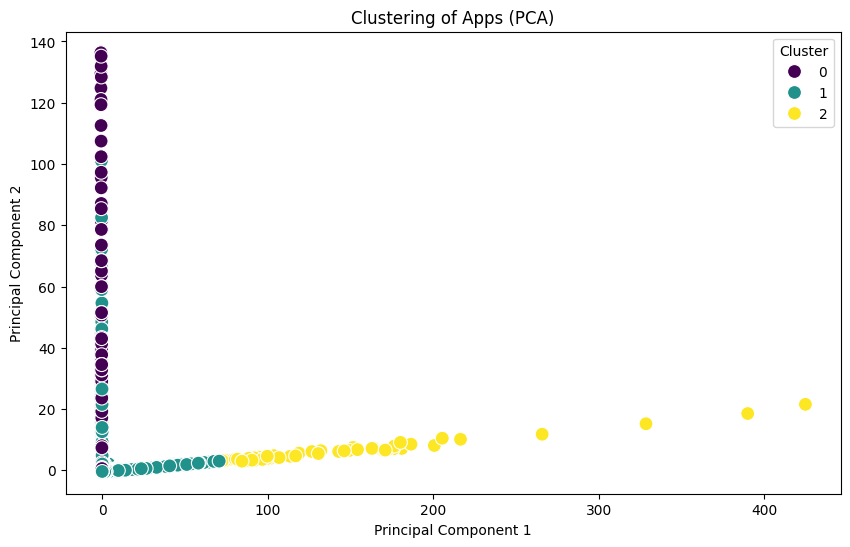

In [5]:
# Using PCA for Dimensionality Reduction

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis', s=100
)
plt.title('Clustering of Apps (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

### Step 5: Feedback Loop for Refinement

In [6]:
# Focus on a Specific Cluster

# Display cluster summary
print("Cluster Summary:")
print(data.groupby('Cluster').mean())

# Ask user for feedback
print("\nFeedback Options:")
print("1. Focus on a specific cluster (e.g., Cluster 0).")
print("2. Proceed without refinement.")

# User input
choice = int(input("Enter your choice (1 or 2): "))

if choice == 1:
    cluster_choice = int(input("Enter the cluster number to focus on (0, 1, or 2): "))
    focused_data = data[data['Cluster'] == cluster_choice].reset_index(drop=True)
    print(f"Focused on Cluster {cluster_choice}.")
else:
    focused_data = data
    print("Proceeding without refinement.")

Cluster Summary:
           Rating  Rating Count  Minimum Installs     Price        PCA1  \
Cluster                                                                   
0        0.030471  7.783455e+00      1.474322e+03  0.123566   -0.130491   
1        4.124613  4.852159e+03      2.532344e+05  0.092292    0.094224   
2        4.305172  1.069468e+07      4.344828e+08  0.000000  138.216413   

             PCA2  
Cluster            
0        0.620448  
1       -0.503838  
2        6.022670  

Feedback Options:
1. Focus on a specific cluster (e.g., Cluster 0).
2. Proceed without refinement.
Focused on Cluster 2.


### Step 6: Re-cluster the Focused Dataset

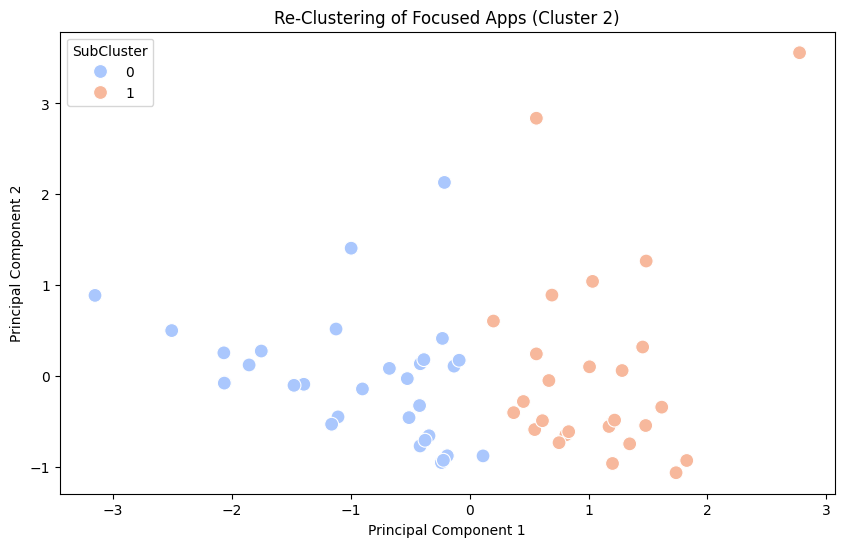

In [7]:
# Reapply Clustering

# Reapply clustering on the focused dataset
if not focused_data.empty:
    focused_data_scaled = scaler.fit_transform(focused_data[features])
    focused_kmeans = KMeans(n_clusters=2, random_state=42)
    focused_data['SubCluster'] = focused_kmeans.fit_predict(focused_data_scaled)

    # Re-visualize clusters
    pca_focused = PCA(n_components=2)
    focused_pca = pca_focused.fit_transform(focused_data_scaled)
    focused_data['PCA1'] = focused_pca[:, 0]
    focused_data['PCA2'] = focused_pca[:, 1]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='PCA1', y='PCA2', hue='SubCluster', data=focused_data, palette='coolwarm', s=100
    )
    plt.title(f'Re-Clustering of Focused Apps (Cluster {cluster_choice})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='SubCluster')
    plt.show()
else:
    print("No data to re-cluster.")